<a href="https://colab.research.google.com/github/Researcher2025/Programmer-2025/blob/main/waterqualityprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(3276, 10)
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate    

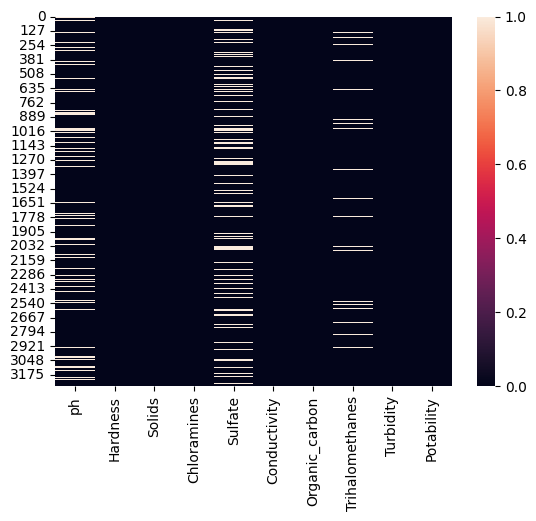

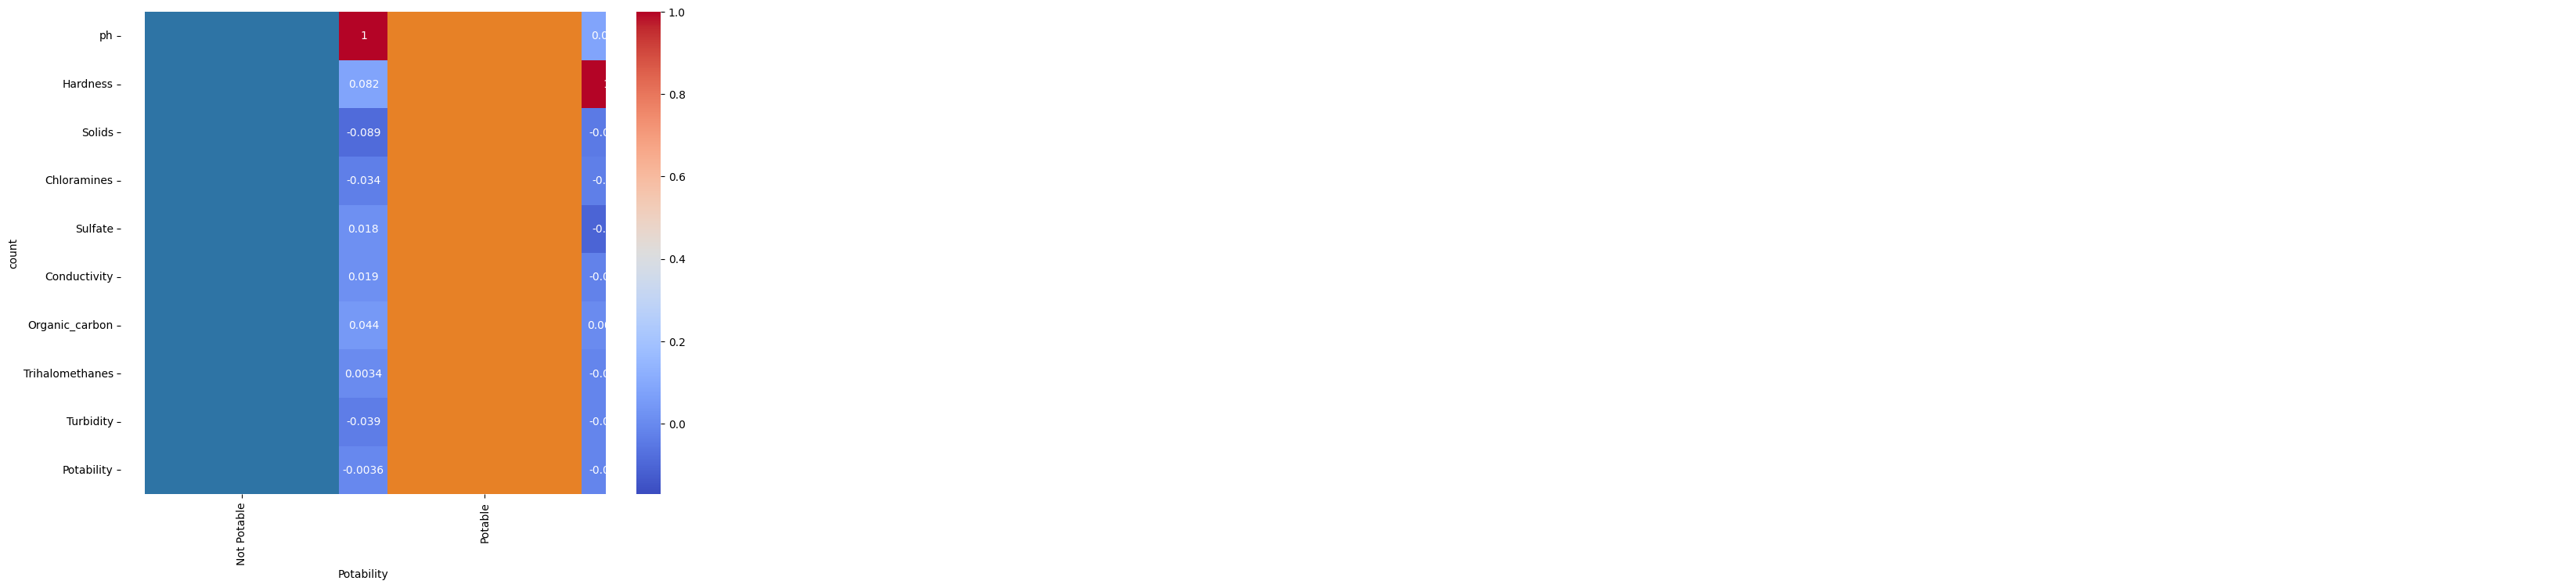

0    1998
1    1278
Name: Potability, dtype: int64


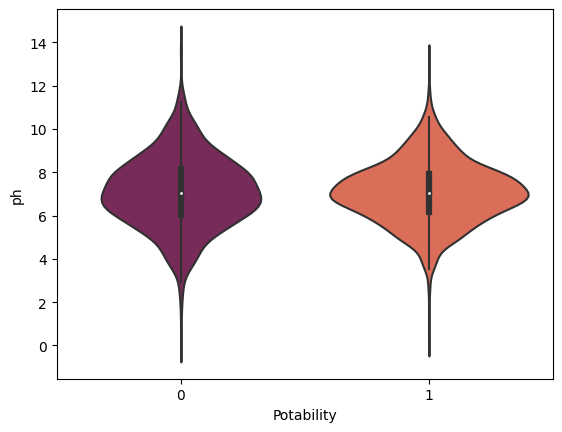

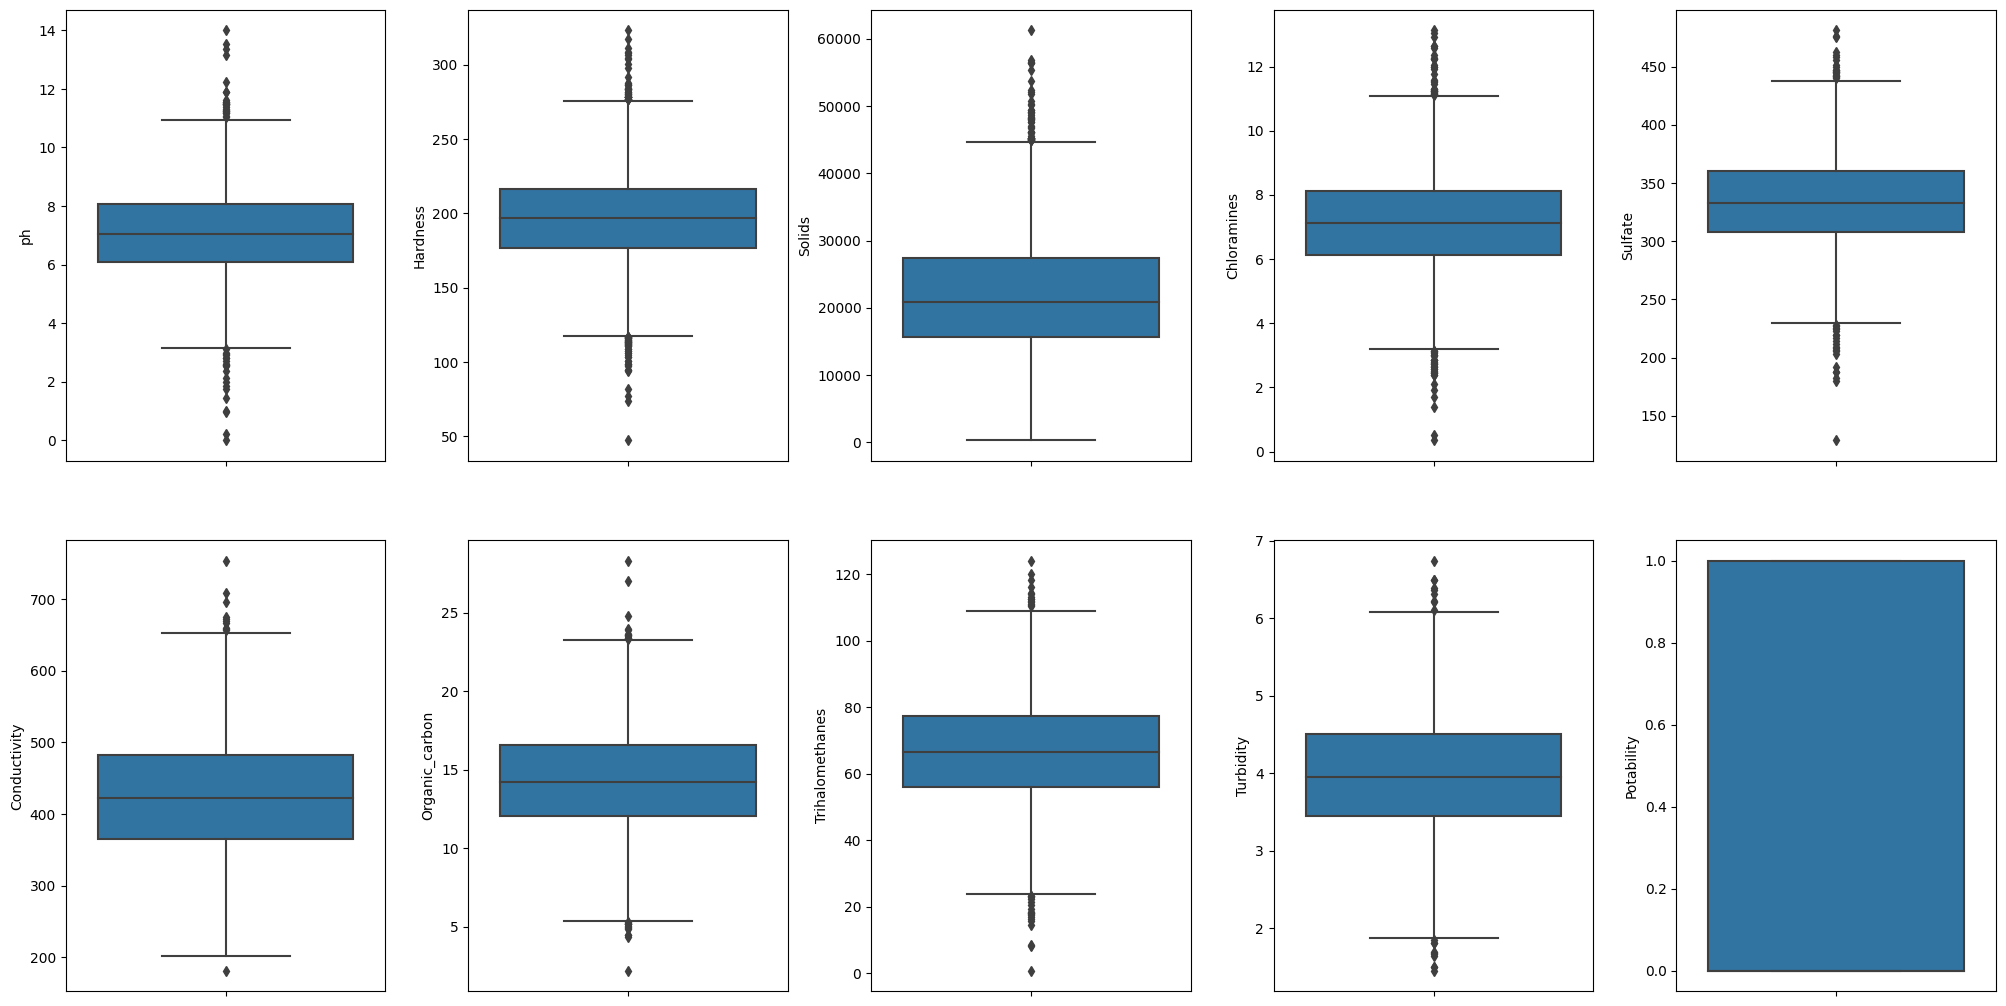

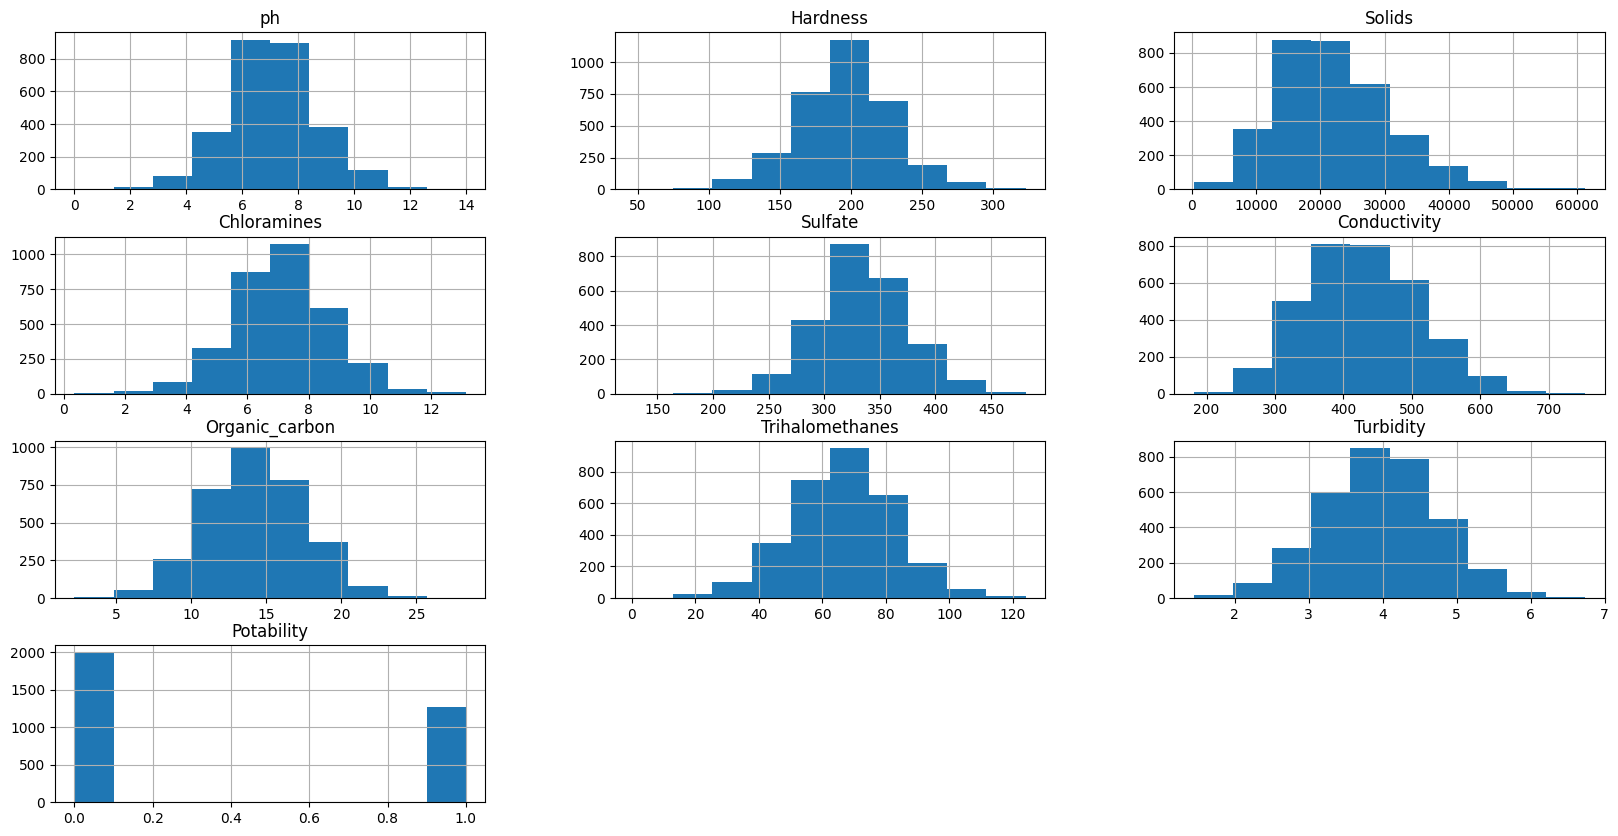

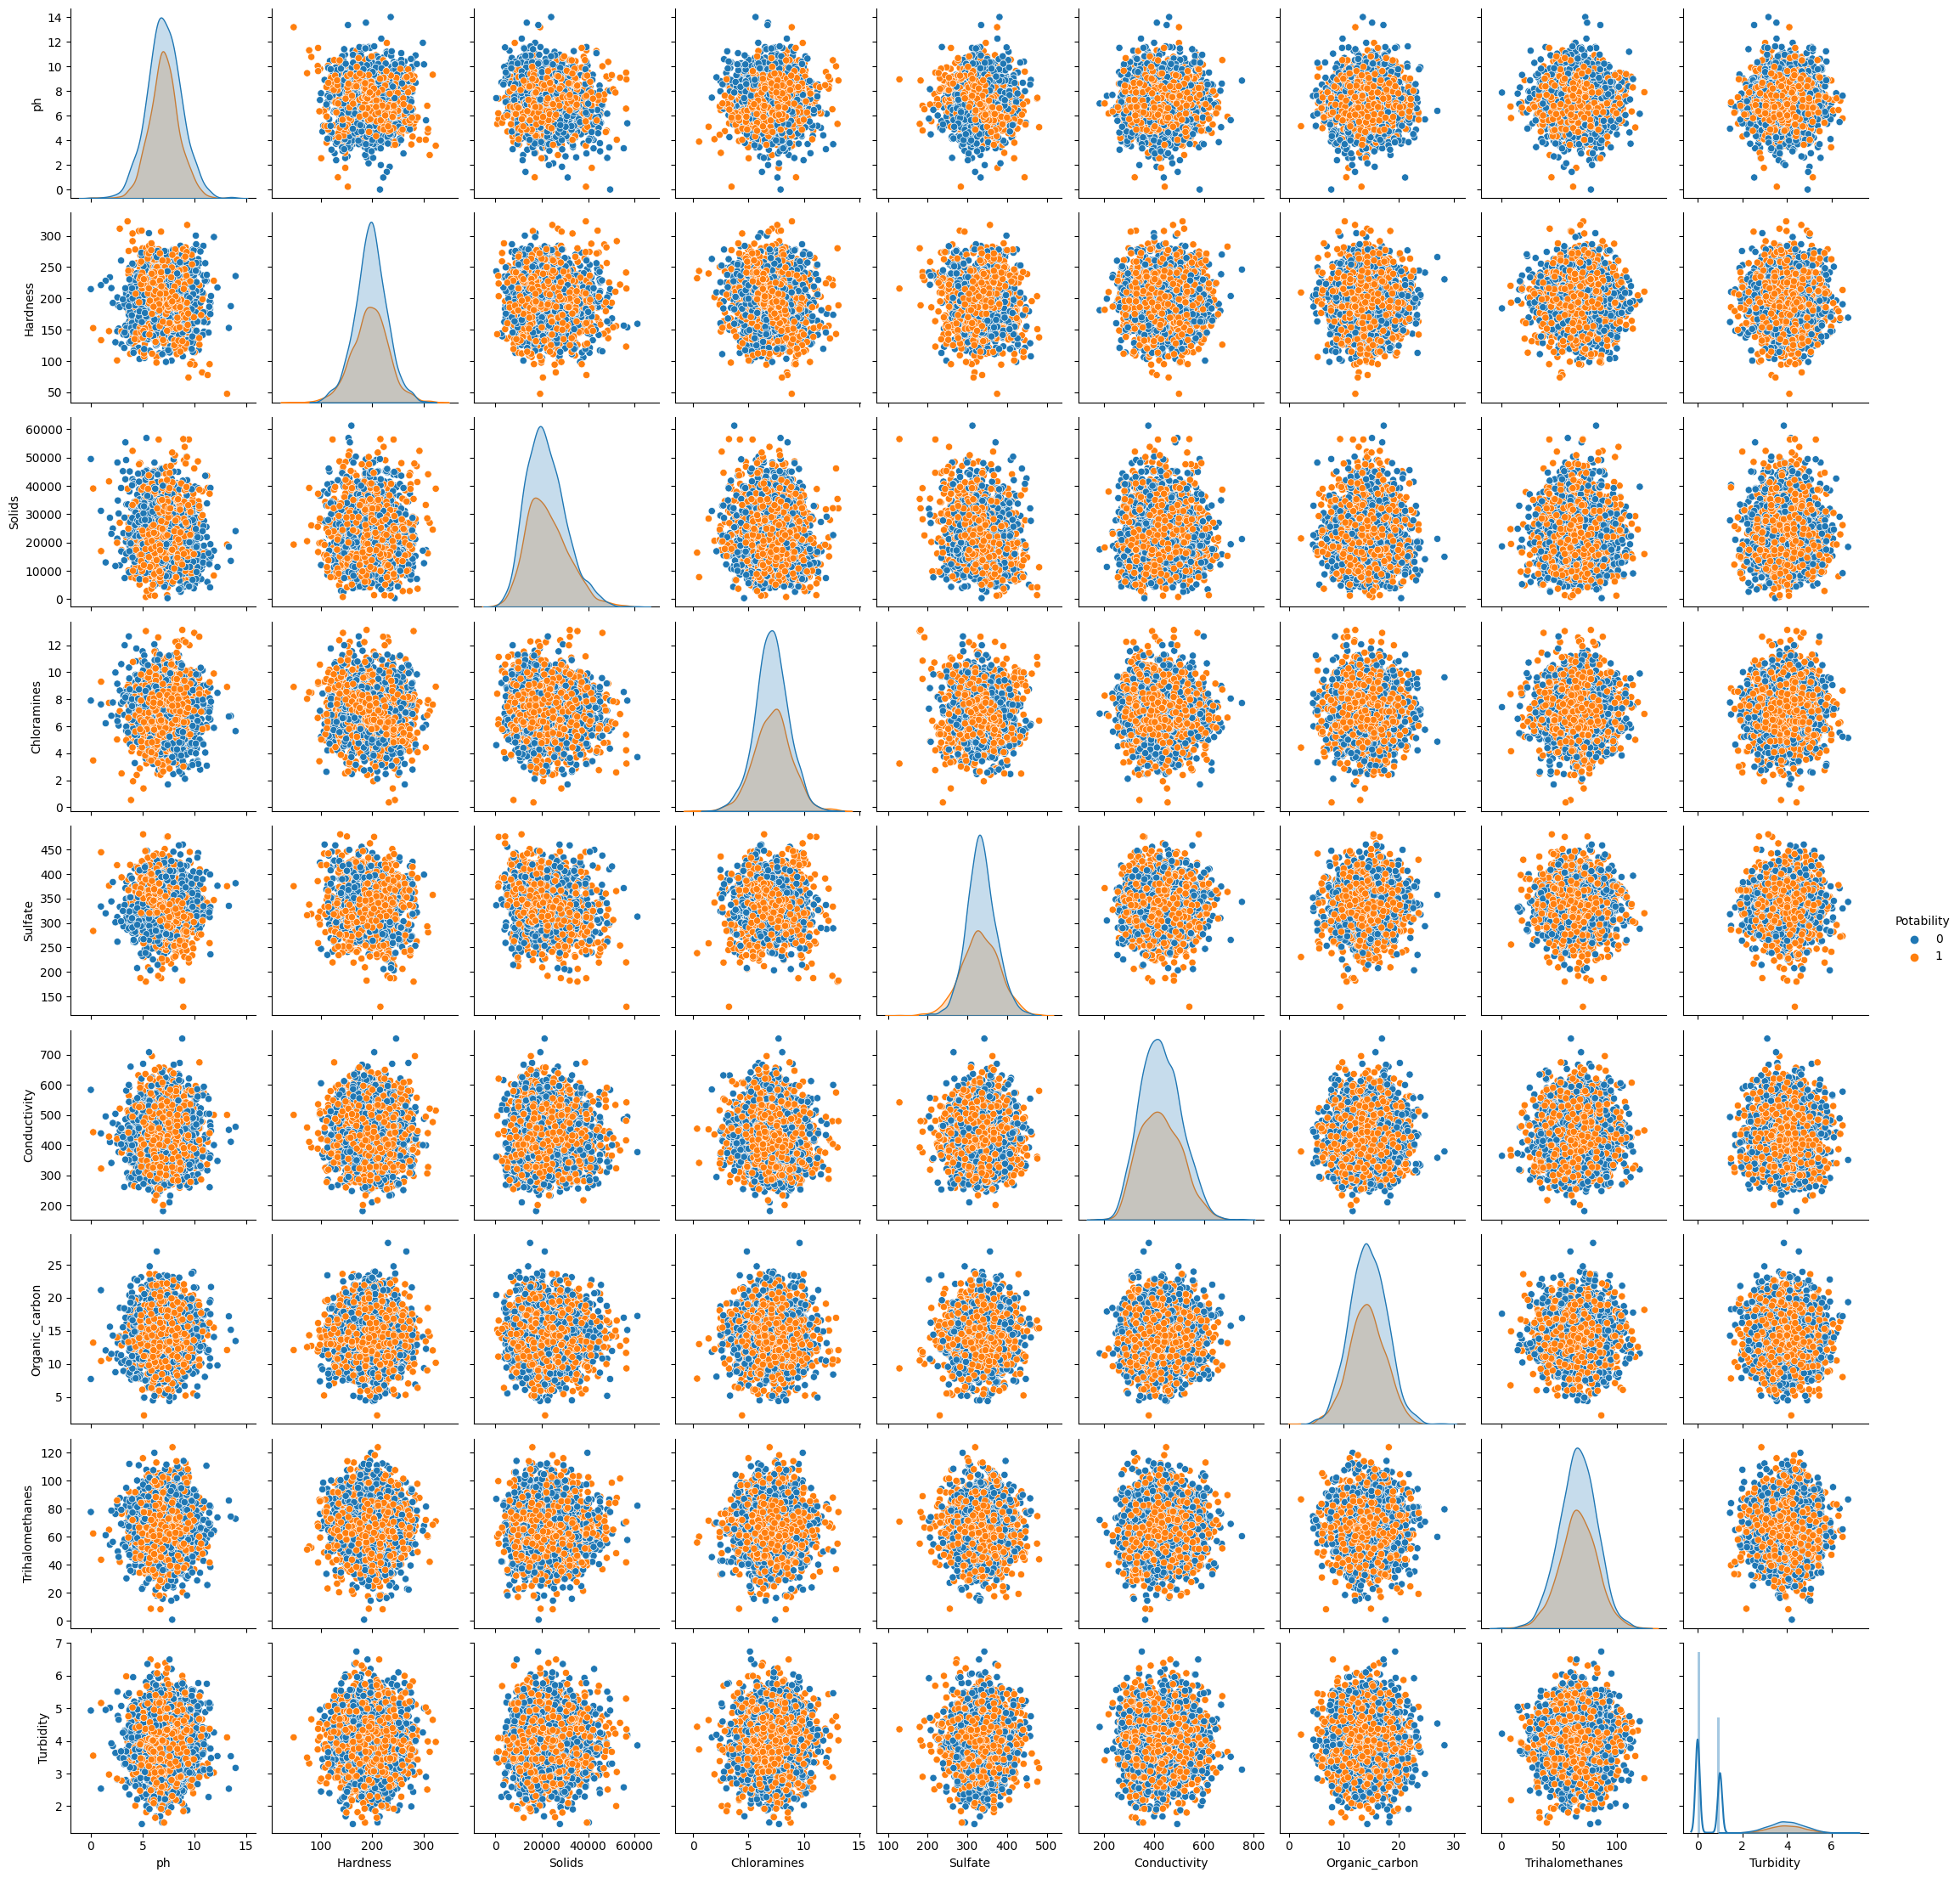

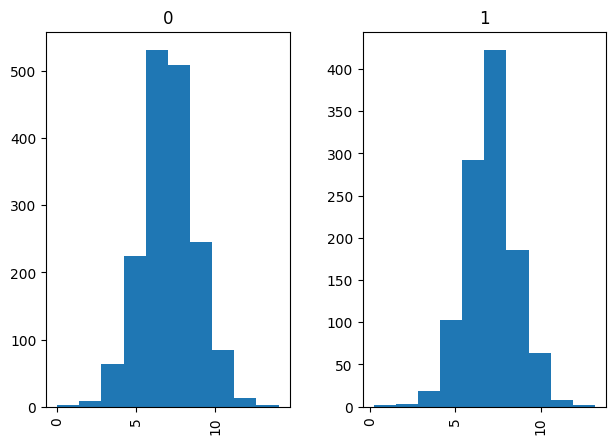

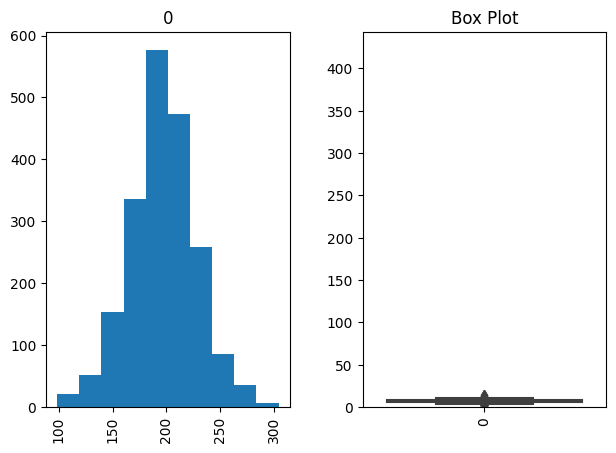

0.6284658040665434
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082

0.6284658040665434


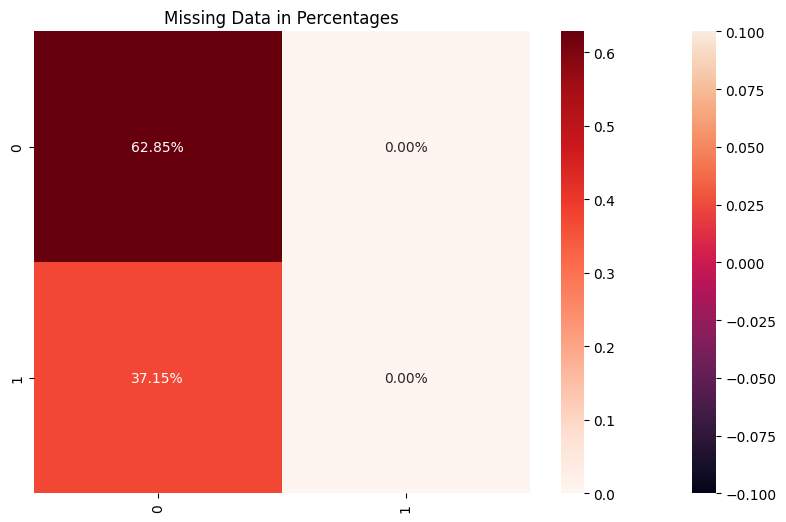

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
main_df = pd.read_csv("/content/water_potability.csv")
df = main_df.copy()
df.head()
print(df.shape)
print(df.columns)
df.describe()
df.info()
print(df.nunique())
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
corr=df.corr()
c1=corr.abs().unstack()
c1.sort_values(ascending=False)[12:24:2]
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()
x = df.Potability.value_counts()
labels = [0,1]
print(x)
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')
# Visualizing dataset and also checking for outliers

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()
sns.pairplot(df, hue="Potability")
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(df['Potability'])
df.hist(column='ph', by='Potability')
df.hist(column='Hardness', by='Potability')
# Individual box plot for each feature
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['ph'])
sns.histplot(x = "Hardness", data=df)
df.nunique()
skew_val = df.skew().sort_values(ascending=False)
skew_val
fig = px.box(df, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()
fig = px.box(df, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()
fig = px.histogram (df, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()
fig = px.histogram (df, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()
fig = px.scatter (df, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df.head()
sns.heatmap(df.isnull())
df.isnull().sum()
X = df.drop('Potability', axis=1)
y = df['Potability']
X.shape, y.shape
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)
print(classification_report(y_test,pred_lg))
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')
print(lg)

In [ ]:
import pickle

# Load the model from the original pickle file
with open('"/content/water_potability.csv"', 'rb') as file:
    original_model = pickle.load(file)

# Re-save the model in the current environment
with open('/content/water_potability.csv', 'wb') as file:
    pickle.dump(original_model, file)

FileNotFoundError: ignored